# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"
 
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

599

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config info

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = url + "APPID=" + api_key + "&units=" + units + "&q="

name = []
country = []
lat = []
long = []
temp_max = []
humidity = []
cloudiness = []
windspeed = []
date =[]


print('Beginning Data Retrieval')
print('-----------------------------------------')


#Build query
for city in cities:
    
    #time delay
    time.sleep(1.001)
    
    #Get weather data
    weather_response = requests.get(query_url + city)
    weather_json = weather_response.json()

    try:
        name.append(weather_json['name'])
        country.append(weather_json['sys']['country'])
        lat.append(weather_json['coord']['lat'])
        long.append(weather_json['coord']['lon'])
        temp_max.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed'])
        date.append(weather_json['dt'])

        print(f"Processing data for city = {city}.")
        
    except KeyError:
        print(f"City not found.  Skipping... {city}")
    
    


Beginning Data Retrieval
-----------------------------------------
Processing data for city = vostok.
Processing data for city = hermanus.
Processing data for city = bethel.
Processing data for city = fortuna.
Processing data for city = saskylakh.
Processing data for city = busselton.
Processing data for city = albany.
Processing data for city = wageningen.
Processing data for city = punta arenas.
Processing data for city = atuona.
Processing data for city = puerto ayora.
Processing data for city = husavik.
Processing data for city = vaini.
Processing data for city = arraial do cabo.
Processing data for city = mahalingpur.
Processing data for city = victoria.
Processing data for city = ushuaia.
Processing data for city = jamestown.
Processing data for city = port elizabeth.
Processing data for city = kapaa.
Processing data for city = kanke.
Processing data for city = rikitea.
Processing data for city = nantucket.
Processing data for city = hobart.
Processing data for city = ahipara.
Pr

Processing data for city = avarua.
Processing data for city = koygorodok.
Processing data for city = umm bab.
Processing data for city = gat.
Processing data for city = divnogorsk.
City not found.  Skipping... karamea
Processing data for city = tiksi.
Processing data for city = paamiut.
Processing data for city = trincomalee.
Processing data for city = sao filipe.
Processing data for city = college.
Processing data for city = lokoja.
Processing data for city = asnaes.
Processing data for city = lata.
Processing data for city = aklavik.
Processing data for city = talnakh.
Processing data for city = bose.
Processing data for city = abu samrah.
City not found.  Skipping... korla
Processing data for city = kodinsk.
Processing data for city = nokaneng.
Processing data for city = huty.
Processing data for city = port macquarie.
Processing data for city = lashio.
Processing data for city = waipawa.
Processing data for city = noumea.
Processing data for city = chara.
City not found.  Skipping.

Processing data for city = rapid valley.
Processing data for city = port lincoln.
Processing data for city = sokoni.
City not found.  Skipping... samalaeulu
Processing data for city = kyzyl-suu.
Processing data for city = ben tre.
Processing data for city = atar.
Processing data for city = baruun-urt.
Processing data for city = constitucion.
Processing data for city = salalah.
City not found.  Skipping... saleaula
Processing data for city = den helder.
Processing data for city = westport.
Processing data for city = navahrudak.
Processing data for city = eenhana.
City not found.  Skipping... sentyabrskiy
Processing data for city = luderitz.
Processing data for city = tura.
Processing data for city = ushtobe.
Processing data for city = namatanai.
Processing data for city = simao.
City not found.  Skipping... safwah
Processing data for city = natal.
City not found.  Skipping... jujuy
City not found.  Skipping... yei
Processing data for city = moses lake.
Processing data for city = maragog

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
weather_transposed = zip(name,country,lat,long,temp_max,humidity,cloudiness,windspeed,date)
weather_df = pd.DataFrame(weather_transposed, columns=['City','Country','Latitude',
                                                       'Longitude','Max Temperature',
                                                       'Humidity','Cloudiness','Wind Speed','Date'])

weather_df.to_csv('city_data.csv')

weather_df

,City,Country,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
0,Vostok,RU,46.45,135.83,24.04,55,0,1.53,1570891127
1,Hermanus,ZA,-34.42,19.24,70.00,60,76,4.00,1570890988
2,Bethel,US,60.79,-161.76,28.40,86,1,6.93,1570891129
3,Fortuna,US,40.60,-124.16,44.60,75,1,8.05,1570890990
4,Saskylakh,RU,71.97,114.09,26.37,89,100,10.93,1570890991
...,...,...,...,...,...,...,...,...,...
539,Gizo,IL,31.80,34.94,82.40,58,20,10.29,1570891941
540,Nelson Bay,AU,-32.72,152.14,61.00,82,75,3.36,1570891942
541,Yar-Sale,RU,66.83,70.83,35.37,98,100,9.05,1570891944
542,Bara,NG,10.41,10.60,89.74,48,29,6.58,1570891945


In [28]:
# set max limit of chart 

max_limit_temp = max(temp_max) + 20
min_limit_temp = min(temp_max) - 10
max_limit_humidity = max(humidity) + 20
max_limit_wind = max(windspeed) + 10

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

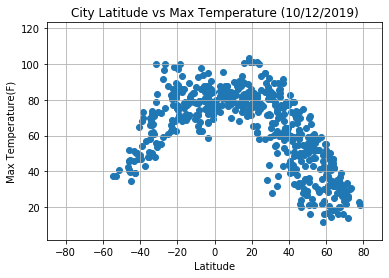

In [30]:
# Build a scatter plot for Latitude vs Max Temp
plt.scatter(weather_df["Latitude"], weather_df["Max Temperature"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Max Temperature(F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([min_limit_temp,max_limit_temp])

# Save the figure
plt.savefig("TemperatureInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

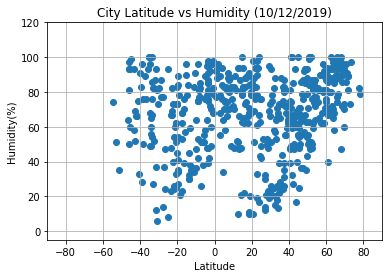

In [31]:
# Build a scatter plot for Latitude vs Humidity
plt.scatter(weather_df["Latitude"], weather_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-5,max_limit_humidity])


# Save the figure
plt.savefig("HumidityInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

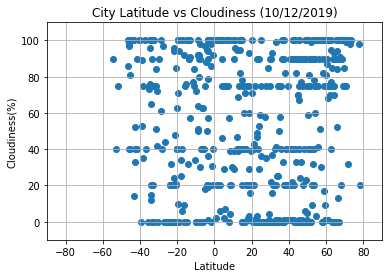

In [11]:
# Build a scatter plot for Latitude vs Cloudiness
plt.scatter(weather_df["Latitude"], weather_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-10,110])

# Save the figure
plt.savefig("CloudinessInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

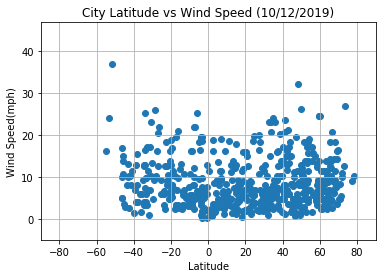

In [32]:
# Build a scatter plot for Latitude vs Wind Speed
plt.scatter(weather_df["Latitude"], weather_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {datetime.datetime.now():(%m/%d/%Y)}")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.xlim([-90,90])
plt.ylim([-5,max_limit_wind])

# Save the figure
plt.savefig("WindSpeedInWorldCitiesbyLatitude.png")

# Show plot
plt.show()

Observations:

1) It shows that the maximum temperature near the equator (Latitude 0) is much higher then at the Poles (Latitude -90/90).  Interestingly there is more colder city on average in the northern hemisphere then the southern hemisphere.

2) The evaluation of humidity looks that the equator and poles (latitude 0 and -90/90) have a higher humidity and the middle latitude have a lower humidity

3) The wind speed appears pretty constant throughout all latitudes with a few outliers at